<a href="https://colab.research.google.com/github/rezakhanahmadi342341/projects/blob/main/Diabetes%20Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [209]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [210]:
data = pd.read_csv('/content/diabetes.csv')

In [211]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [212]:
x = data.drop(columns='Outcome',axis=1)
y = data['Outcome']

In [213]:
scale = StandardScaler()
x = scale.fit_transform(x)

In [214]:
x = pd.DataFrame(x, columns=scale.get_feature_names_out())

In [215]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

In [216]:
best_score = []
model = [LogisticRegression(), SVC(),KNeighborsClassifier(), DecisionTreeClassifier(random_state=3), RandomForestClassifier(),GaussianNB(),GradientBoostingClassifier() ]
for i in model:
  model = i
  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)
  score = accuracy_score(y_test, y_pred)
  best_score.append(score)
  print(" "*100)
  print('-'* 100)
  print(" "*100)
  print(f'{i}: {score}')


print(" " * 100)
print("-" * 100)
print(" " * 100)
print('>' * 10)
print('>'* 10, f'The best score is: {max(best_score)}')
print('>' * 10)

                                                                                                    
----------------------------------------------------------------------------------------------------
                                                                                                    
LogisticRegression(): 0.7012987012987013
                                                                                                    
----------------------------------------------------------------------------------------------------
                                                                                                    
SVC(): 0.6883116883116883
                                                                                                    
----------------------------------------------------------------------------------------------------
                                                                                                    
KNeighborsClassifier(): 

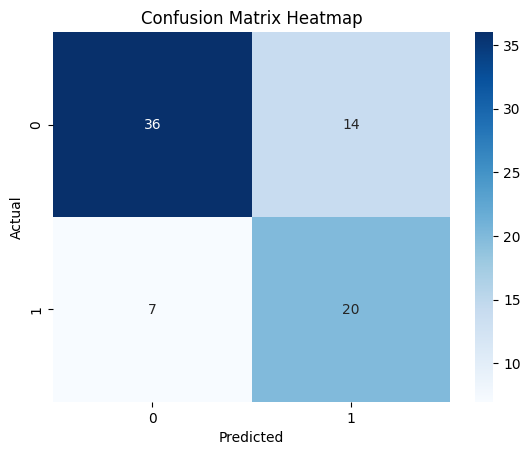

In [217]:
cm = confusion_matrix(y_test, y_pred)

# Create the heatmap
sns.heatmap(cm, annot=True, cmap="Blues", fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()